In [1]:
# Primero importamos todas las bibliotecas, primero las de siempre siendo pandas, numpy, matplotlib y seaborn.

import pandas as pd     
import numpy as np      
from matplotlib import pyplot as plt 
import seaborn as sns                

# Siguiendo, las librerias donde manejaremos todos los modelos y metricas, siendo estas las de sklearn, y las de
# xboost. En donde veremos todo el procesamiento y ajuste de los modelos de regresion lineal, lasso y random forest.

from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso, LinearRegression, LassoCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

from sklearn.inspection import permutation_importance 
import multiprocessing

import xgboost as xgb
from xgboost import plot_importance

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)
%matplotlib inline

In [2]:
data = pd.read_csv('/home/pato/Magister Data Science/Segundo Trimestre Data Science/Analisis de Datos para Data Science/Capstone Project/Clean_SeoulBikeData.csv',
                   encoding='unicode escape')

In [3]:
data.head()

,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12,1,0,0,1,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,12,1,0,0,1,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,12,1,0,0,1,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,12,1,0,0,1,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,12,1,0,0,1,1


In [4]:
#transformación a dummie variables categoricas independientes
dummies = data[['Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday']]

#variables numericas independientes
X_numerical = data.drop('Rented Bike Count', axis=1)
X_numerical = X_numerical.drop(dummies, axis=1)
X_numerical

,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12,1
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,12,1
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,12,1
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,12,1
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,12,1
...,...,...,...,...,...,...,...,...,...,...
8460,19,4.2,34,2.6,1894,0.0,0.0,0.0,30,11
8461,20,3.4,37,2.3,2000,0.0,0.0,0.0,30,11
8462,21,2.6,39,0.3,1968,0.0,0.0,0.0,30,11
8463,22,2.1,41,1.0,1859,0.0,0.0,0.0,30,11


In [5]:
#nombre variables numericas
list_numerical = X_numerical.columns

#variables independientes final
X = pd.concat([X_numerical, dummies], axis=1)
y = data['Rented Bike Count']

In [6]:
# Separacion de datos de entrenamiento y testeo
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)

In [7]:
# Aqui le aplicamos un escalamiento estandard, en donde escalaremos solo las variables numericas ya que 
# esto no es necesario para las categoricas

standard = StandardScaler()

X_train[list_numerical] = standard.fit_transform(X_train[list_numerical])
X_test[list_numerical] = standard.transform(X_test[list_numerical])

# Regresion Lineal

R^2 is 0.54
 RMSE is: 447.11


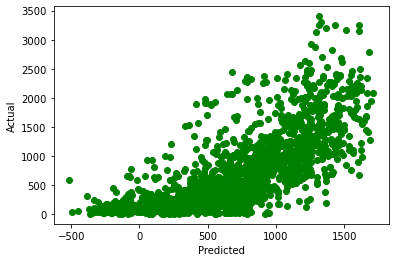

In [8]:
# Aqui aplicaremos regresion lineal, en donde veremos los valores de r cuadrado y los errores cuadrados
# Esto lo veremos tambien para Lasso y RandomForest

LR = LinearRegression()

LR.fit(X_train,y_train)
y_pred_LR=LR.predict(X_test)
plt.scatter(y_pred_LR,y_test,color='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 is {round(LR.score(X_test,y_test),2)}\n RMSE is: {round(mean_squared_error(y_test,y_pred_LR,squared=False),2)}')

# Lasso

R^2 is 0.54
 RMSE is: 447.38


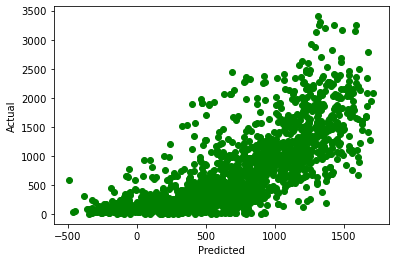

In [9]:
lasso = Lasso(alpha=1)

lasso.fit(X_train,y_train)
y_pred_lasso=lasso.predict(X_test)
plt.scatter(y_pred_lasso,y_test,color='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 is {round(lasso.score(X_test,y_test),2)}\n RMSE is: {round(mean_squared_error(y_test,y_pred_lasso,squared=False),2)}')

In [10]:
#explorando los coeficientes de la regresión. Hay dos coeficientes con valores cercanos a cero
lasso.coef_

array([ 200.00851481,  317.72794536, -166.27424237,   17.49838958,
          9.22800292,  -69.80286128,  -69.62587641,   14.81048291,
         -7.46564919,   10.54083401, -116.29963655, -127.68858564,
       -351.31916471,   75.94127353])

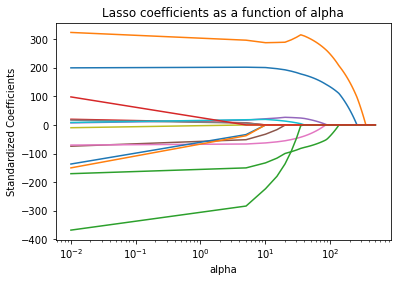

In [11]:
# Visualizacion de los coeficientes y cuanto debe ser el alpha para que cada uno llegue a cero.

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [12]:
# Lasso con un cross-validation de 10
lassocv = LassoCV(cv=10, random_state=37, max_iter=100000)

# Le hacemos un fit al modelo
lassocv.fit(X_train, y_train)

lassocv.alpha_

0.3575223547961192

R^2 is 0.54
 RMSE is: 447.18


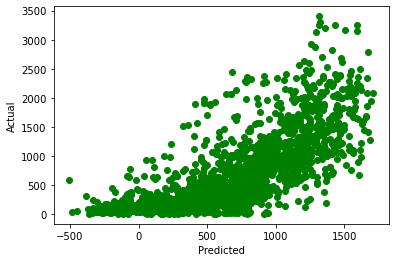

In [13]:
# De aqui con el mejor alpha lo reemplazamos y revisamos el nuevo resultado
# Veremos que aqui el resultado da casi igual que el anterior
lasso_best = Lasso(alpha=lassocv.alpha_)
lasso_best.fit(X_train, y_train)
y_pred_lassobf=lasso_best.predict(X_test)
plt.scatter(y_pred_lassobf,y_test,color='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 is {round(lasso_best.score(X_test,y_test),2)}\n RMSE is: {round(mean_squared_error(y_test,y_pred_lassobf,squared=False),2)}')

# Random Forest

R^2 is 0.88
 RMSE is: 224.43


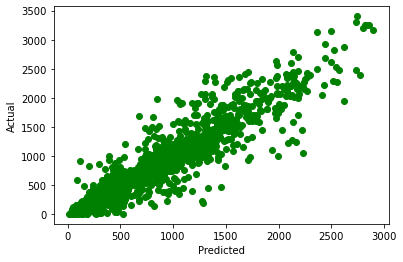

In [14]:
rf = RandomForestRegressor()

rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
plt.scatter(y_pred_rf,y_test,color='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 is {round(rf.score(X_test,y_test),2)}\n RMSE is: {round(mean_squared_error(y_test,y_pred_rf,squared=False),2)}')

In [15]:
# Grid de hiperparámetros evaluados
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20]
             }

grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
0,None,5,150,-228.329315,8.366194,-84.953869,1.071101
1,None,7,150,-228.468446,8.736110,-84.879750,1.072081
9,20,5,150,-228.546171,8.540168,-86.910570,0.987677
10,20,7,150,-228.988446,9.076985,-86.216874,1.123084


In [16]:
# Evaluacion del modelo final, vemos de igual forma que con lasso nos da casi el mismo resultado.

modelo_final = grid.best_estimator_
y_pred_rf_best = modelo_final.predict(X = X_test)
rmse_final = mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred_rf_best,
        squared = False
       )
print(f"El error (rmse) de test es: {round(rmse_final,2)}")
print(f'R^2 is {round(modelo_final.score(X_test,y_test),2)}')

El error (rmse) de test es: 221.78
R^2 is 0.89


In [17]:
# Aqui obtenemos la importancia de los predictores para ver que factores afectan de mayor manera al modelo
# Como se ve la hora y la temperatura tienen una mayor influencia

importancia_predictores_rf = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': modelo_final.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores_rf.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,Hour,0.299875
1,Temperature(Â°C),0.255671
2,Humidity(%),0.097261
12,Seasons_Winter,0.083559
5,Solar Radiation (MJ/m2),0.072640
6,Rainfall(mm),0.043708
4,Visibility (10m),0.032892
8,Day,0.030214
3,Wind speed (m/s),0.028550
9,Month,0.025319


In [18]:
# De aqui obtenemos la media y la desviacion de las importancias

importancia = permutation_importance(
                estimator    = modelo_final,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
0,440.875841,4.071858,Hour
1,359.149860,3.982712,Temperature(Â°C)
2,178.954756,3.221590,Humidity(%)
5,159.178158,1.897274,Solar Radiation (MJ/m2)
12,153.247725,1.973503,Seasons_Winter
6,72.956095,4.090770,Rainfall(mm)
9,60.672112,1.027997,Month
4,60.098227,1.361107,Visibility (10m)
8,57.732455,0.810394,Day
3,50.251142,0.295060,Wind speed (m/s)


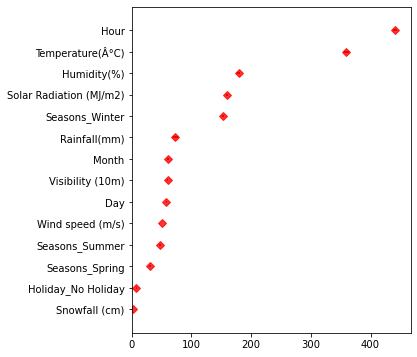

In [19]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
plt.show()

In [20]:
model_data = {
    'Models': ['LinearRegression', 'Lasso', 'RandomForest'],
    'Test_R2_Score': [round(LR.score(X_test,y_test),2),
                      round(lasso_best.score(X_test,y_test),2),
                      round(modelo_final.score(X_test,y_test),2)],
    'Test_RMSE_Score': [round(mean_squared_error(y_test,y_pred_LR,squared=False),2),
                        round(mean_squared_error(y_test,y_pred_lassobf,squared=False),2),
                        round(mean_squared_error(y_test,y_pred_rf_best,squared=False),2)]
}

In [21]:
# Finalmente, vemos que el Random Forest nos da el mejor resultado, con un 0.89 de r cuadrado

df_all_model=pd.DataFrame(model_data)
df_all_model

,Models,Test_R2_Score,Test_RMSE_Score
0,LinearRegression,0.54,447.11
1,Lasso,0.54,447.18
2,RandomForest,0.89,221.78
